# PROJECT 3A_RTS: Big data analysis of an electricity power consumption (Tetouan Town - Morocco) and visualizing Prediction results

## 1) Import useful libraries¶

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error

## 2) Retrieve the dataset

In [3]:
consumptionTetuan=pd.read_csv("Tetuan City power consumption.csv")
consumptionTetuan.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


In [4]:
zone1 = consumptionTetuan['Zone 1 Power Consumption']
zone2 = consumptionTetuan['Zone 2  Power Consumption'] 
zone3 = consumptionTetuan['Zone 3  Power Consumption']

## 3) Recurrent neural network model (RNN)

In [5]:
consumptionTetuan = consumptionTetuan.drop(['DateTime', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption' ], axis=1)
train_prop = 0.8
train_len = int(train_prop*len(consumptionTetuan))
X_train = consumptionTetuan.loc[: train_len-1]
X_test = consumptionTetuan.loc[train_len:]

In [6]:
print('Dataset       : ', consumptionTetuan.shape)
print('Train dataset : ', X_train.shape)
print('Test  dataset : ', X_test.shape)

Dataset       :  (52416, 6)
Train dataset :  (41932, 6)
Test  dataset :  (10484, 6)


In [7]:
X_train.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620


In [8]:
# En apppliquant les formules

mean = X_train.mean()
std  = X_train.std()
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std

In [9]:
X_train_norm.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
count,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04
mean,-1.726059e-16,-1.815941e-14,-2.225156e-14,1.194384e-14,2.720123e-14,-2.006695e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.742845e+00,-3.505201e+00,-8.745195e-01,-7.187839e-01,-6.283486e-01,-2.672274e+00
25%,-7.869008e-01,-6.427036e-01,-8.627553e-01,-7.185623e-01,-6.275259e-01,-8.467699e-01
50%,6.051269e-02,1.062274e-01,-8.585538e-01,-6.687039e-01,-5.346885e-01,1.696600e-02
75%,7.381072e-01,8.501779e-01,1.169940e+00,5.833309e-01,2.365217e-01,6.933124e-01
max,3.438397e+00,1.628369e+00,1.213215e+00,3.438150e+00,6.568441e+00,2.668090e+00


In [10]:
X_train_norm.head(15)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,-2.185974,0.383263,-0.860655,-0.718616,-0.627580,0.138099
1,-2.210354,0.426842,-0.860655,-0.718548,-0.627841,-0.453112
2,-2.227336,0.426842,-0.861915,-0.718577,-0.627726,-0.548824
3,-2.259618,0.457970,-0.860655,-0.718473,-0.627757,-0.674181
4,-2.293245,0.501548,-0.861495,-0.718627,-0.627841,-0.798692
5,-2.304679,0.576255,-0.861495,-0.718587,-0.627664,-0.897792
6,-2.340324,0.626059,-0.861915,-0.718627,-0.627757,-0.985033
7,-2.364704,0.657187,-0.859814,-0.718602,-0.627780,-1.062111
8,-2.334103,0.650961,-0.861495,-0.718562,-0.627411,-1.155282
9,-2.365545,0.601157,-0.861075,-0.718577,-0.627641,-1.224737


In [11]:
X_train_norm = X_train_norm.to_numpy()
X_test_norm = X_test_norm.to_numpy()

In [40]:
sequence_len     = 10
batch_size       = 32

In [41]:
train_generator = TimeseriesGenerator(X_train_norm, X_train_norm, length=sequence_len,  batch_size=batch_size)
test_generator  = TimeseriesGenerator(X_test_norm,  X_test_norm,  length=sequence_len,  batch_size=batch_size)

In [42]:
x,y=train_generator[0]
print(f'Nombre de train batchs disponibles : ', len(train_generator))
print('batch x shape : ',x.shape)
print('batch y shape : ',y.shape)

Nombre de train batchs disponibles :  1311
batch x shape :  (32, 10, 6)
batch y shape :  (32, 6)


In [43]:
x[0]

array([[-2.18597367,  0.38326337, -0.86065451, -0.71861587, -0.62757968,
         0.13809938],
       [-2.21035362,  0.42684207, -0.86065451, -0.71854795, -0.62784111,
        -0.45311231],
       [-2.22733552,  0.42684207, -0.86191497, -0.71857655, -0.62772578,
        -0.54882423],
       [-2.25961794,  0.4579697 , -0.86065451, -0.71847289, -0.62775653,
        -0.67418144],
       [-2.29324546,  0.5015484 , -0.86149482, -0.71862659, -0.62784111,
        -0.79869164],
       [-2.30467881,  0.57625473, -0.86149482, -0.71858727, -0.62766426,
        -0.8977916 ],
       [-2.34032398,  0.62605895, -0.86191497, -0.71862659, -0.62775653,
        -0.98503344],
       [-2.36470393,  0.65718659, -0.85981421, -0.71860157, -0.6277796 ,
        -1.06211118],
       [-2.33410289,  0.65096106, -0.86149482, -0.71856225, -0.62741053,
        -1.15528208],
       [-2.36554462,  0.60115684, -0.86107467, -0.71857655, -0.6276412 ,
        -1.22473675]])

In [44]:
y[0]

array([-2.36134118,  0.61360789, -0.86149482, -0.71861587, -0.62766426,
       -1.27809826])

In [17]:
model = keras.models.Sequential()
model.add( keras.layers.InputLayer(input_shape=(sequence_len, 6)) )
model.add( keras.layers.LSTM(100, activation='relu') )
model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', 
              loss='mse', 
              metrics   = ['mae'] )

In [19]:
fit_verbosity = 1
epochs = 10

history=model.fit(train_generator, 
                  epochs  = epochs, 
                  verbose = fit_verbosity,
                  validation_data = test_generator)

Epoch 1/10
1310/1310 [==============================] - 23s 17ms/step - loss: 0.7985 - mae: 0.7041 - val_loss: 0.5280 - val_mae: 0.5585
Epoch 2/10
1310/1310 [==============================] - 23s 17ms/step - loss: 0.7898 - mae: 0.6994 - val_loss: 0.5284 - val_mae: 0.5611
Epoch 3/10
1310/1310 [==============================] - 26s 20ms/step - loss: 0.7887 - mae: 0.6988 - val_loss: 0.5270 - val_mae: 0.5572
Epoch 4/10
1310/1310 [==============================] - 32s 25ms/step - loss: 0.7885 - mae: 0.6986 - val_loss: 0.5270 - val_mae: 0.5559
Epoch 5/10
1310/1310 [==============================] - 29s 22ms/step - loss: 0.7883 - mae: 0.6986 - val_loss: 0.5267 - val_mae: 0.5562
Epoch 6/10
1310/1310 [==============================] - 22s 17ms/step - loss: 0.7880 - mae: 0.6983 - val_loss: 0.5273 - val_mae: 0.5604
Epoch 7/10
1310/1310 [==============================] - 25s 19ms/step - loss: 0.7878 - mae: 0.6982 - val_loss: 0.5267 - val_mae: 0.5574
Epoch 8/10
1310/1310 [==========================

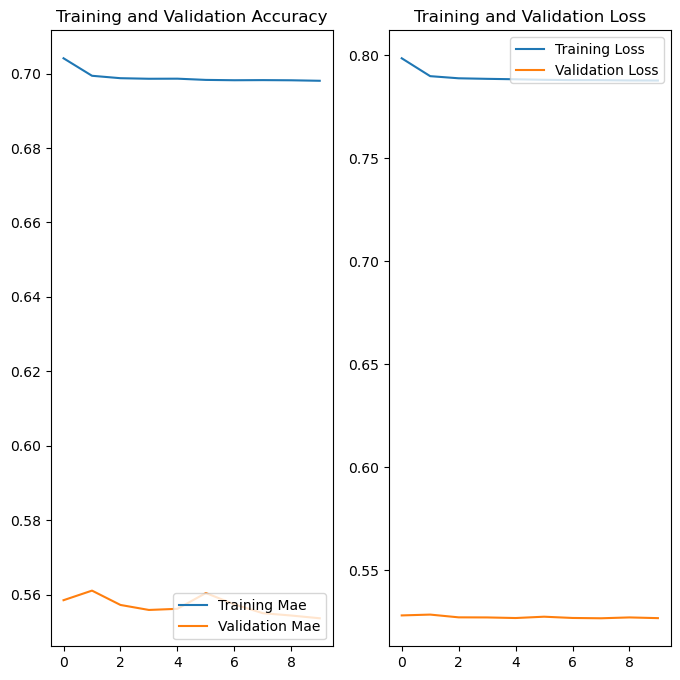

In [20]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training Mae')
plt.plot(epochs_range, val_mae, label='Validation Mae')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
import random
import math
s=random.randint(0,len(X_test_norm)-sequence_len)

sequence      = X_test_norm[s:s+sequence_len]
sequence_true = X_test_norm[s:s+sequence_len+1]
print(sequence)

[[-1.52166205 -0.51632537 -0.86317543 -0.71673219 -0.62390433  0.68943299]
 [-1.56537782 -0.47523689 -0.86317543 -0.7184443  -0.6276412   0.66059821]
 [-1.59227984 -0.42916798 -0.86317543 -0.71858727 -0.6273567   0.64363658]
 [-1.62086323 -0.40426587 -0.86485603 -0.71857655 -0.62775653  0.64533274]
 [-1.65617212 -0.36691271 -0.86443588 -0.71866591 -0.62757968  0.64533274]
 [-1.69148102 -0.33765273 -0.86275527 -0.71858727 -0.6276412   0.64363658]
 [-1.73519679 -0.2984319  -0.86359558 -0.71861587 -0.62781036  0.62497878]
 [-1.74528505 -0.28162298 -0.86401573 -0.71858727 -0.62769502  0.58766319]
 [-1.74696642 -0.26730426 -0.86527618 -0.71864089 -0.6277796   0.57409388]
 [-1.77218706 -0.26543661 -0.86401573 -0.71862659 -0.62749511  0.56900539]]


In [52]:
pred = model.predict( np.array([sequence]) )

1/1 [==============================] - 0s 19ms/step


In [53]:
pred

array([[-0.64722824]], dtype=float32)